# Tutorial 7 - Dropout

**Semester:** Fall 2021

**Adapted by:** James Green and Victoria Ajila

**Adapted from:** [Dropout Neural Network Layer In Keras Explained](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab), by [Cory Maklin](https://medium.com/@corymaklin)

---
## What does dropout do?
Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

Dropout can help a model generalize by randomly setting the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation.

11501568/11490434 [==============================] - 0s 0us/step


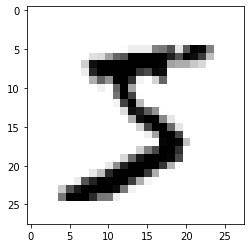

In [3]:
# Step 0: import required libraries
from keras.datasets import mnist
from matplotlib import pyplot as plt
#plt.style.use('dark_background')
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.utils import normalize, to_categorical

# Step 1: load the MNIST digits dataset pre-split into train/test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize the first training exemplar:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [4]:
# Normalize the input images to speed training (model convergence)
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

# Use one-hot encoding of target/output variable
# Avoids unintended relationships between output values 
#(e.g. is confusing a '3' as a '2' less bad than confusing
# a '3' as a '9'? No. So avoid 3 being "closer" to '2' than '9')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Create a model without dropout

The following code will:
- Create the Neural Network
- Include a 'flatten' layer to convert the input images into input vectors
- Print summary of the model, including number of parameters in each layer.


In [5]:
# Build the feed-forward neural network:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax')) # Use softmax since multi-class

# Print summary of model:
model.summary()

## Compile the model
# Use categorical crossentroly as loss function since predicting classes
# Performance measured using accurcay.
# ADAM variant of gradient descent used for training.
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0

# Train a model without dropout.
- Train the model using the training data
- Later, test data will evaluate degree of overfit (with/without dropout)

##Training Parameters:
- Batch size of 32: (32 training samples are chosen randomly per batch prior to updating weights)
     - From the tutorial: "A batch size of 32 implies that we will compute the gradient and take a step in the direction of the gradient with a magnitude equal to the learning rate, after having pass 32 samples through the neural network. We do this a total of 10 times as specified by the number of epochs."
- Validation split parameter: that fraction of the training data is set aside (hold-out set) as a validation set. At each epoch, the loss and other stipulated metrics are evaluated on the train and validation portions of the data. Can plot these.
- Shuffle parameter: shuffles the training data before each epoch

In [6]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2854 - accuracy: 0.9179 - val_loss: 0.1276 - val_accuracy: 0.9638
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1171 - accuracy: 0.9631 - val_loss: 0.0858 - val_accuracy: 0.9725
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0788 - accuracy: 0.9755 - val_loss: 0.0903 - val_accuracy: 0.9715
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0569 - accuracy: 0.9809 - val_loss: 0.0885 - val_accuracy: 0.9743
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0429 - accuracy: 0.9859 - val_loss: 0.0801 - val_accuracy: 0.9773
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.0924 - val_accuracy: 0.9758
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0267 - accuracy: 0.9906 - val_loss: 0.0894 - val_accuracy:

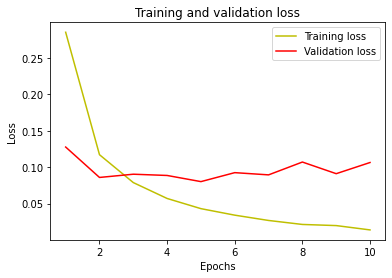

In [7]:
# We can plot the training and validation accuracies at each epoch by using
# the history variable returned by the fit function.

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Performance without dropout
Note from the above figure that the validation loss stops dropping after the first 3 epochs.

Let's look at the training and validation accuracy (will follow the same trend as the loss)

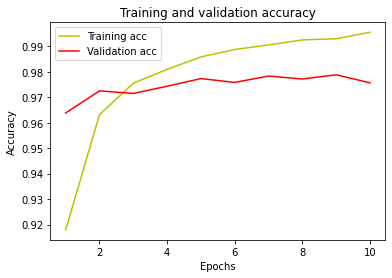

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Report final test accuracy (~97.4%):
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

313/313 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9761


0.9761000275611877

# Add drop-out to the model
From the tutorial: "There’s some debate as to whether the dropout should be placed before or after the activation function. As a rule of thumb, place the dropout after the activate function for all activation functions other than ReLU."

In Keras, the parameter passed to a Dropout layer dictates the probablity of any given hidden unit having its output set to zero during a training iteration. Here, we use 0.5, which indicates a "50% chance that the output of a given neuron will be forced to 0."

In [15]:
# Rebuild the model, this time adding drop-out of 50% of nodes

model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))
model_dropout.summary()

# Compile the model (same as above)
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 128)              

Train the model using dropout. Hoping to see lower validation loss and higher validation accuracy...

In [16]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5357 - accuracy: 0.8375 - val_loss: 0.1644 - val_accuracy: 0.9530
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2903 - accuracy: 0.9164 - val_loss: 0.1233 - val_accuracy: 0.9648
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2441 - accuracy: 0.9288 - val_loss: 0.1189 - val_accuracy: 0.9667
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2114 - accuracy: 0.9388 - val_loss: 0.0969 - val_accuracy: 0.9707
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1961 - accuracy: 0.9436 - val_loss: 0.0927 - val_accuracy: 0.9722
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1830 - accuracy: 0.9471 - val_loss: 0.0879 - val_accuracy: 0.9745
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1692 - accuracy: 0.9504 - val_loss: 0.0841 - val_accuracy:

Note that the **validation** loss achieved above using drop-out is lower than the model that did not use drop-out (0.8 vs. 0.9). The training loss is **higher** using drop-out.

Let's plot it:

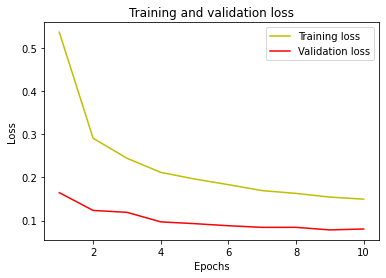

In [17]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the learning curves above, you can see that the model with dropout converges more quickly, whereas the previous model plateaued after 3 epochs.

Let's examine the training and validation accuracy (more or less follows inverse of loss function):

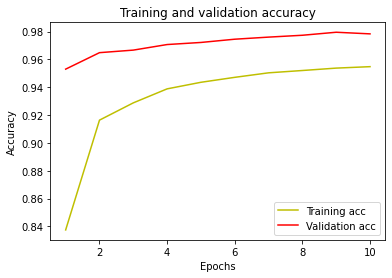

In [19]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Although the validation accuracy was much improved with dropout, when we test the final model on the withheld test data, no significant change in accuracy is observed between dropout/no-dropout. Perhaps a larger test set is required?

In [20]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9720


0.972000002861023

#Final Thoughts
From Cory Maklin: "Dropout can help a model generalize by randomly setting the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation."